<a href="https://colab.research.google.com/github/lephuocdat2000/-CS114.K21-/blob/master/Round2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from yellowbrick.regressor import ResidualsPlot

Lấy data từ link về


In [12]:
!wget http://cs.uit.edu.vn/data2.txt
!ls

--2020-06-19 07:00:48--  http://cs.uit.edu.vn/data2.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1203726 (1.1M) [text/plain]
Saving to: ‘data2.txt.1’

data2.txt.1         100%[===================>]   1.15M   844KB/s    in 1.4s    

2020-06-19 07:00:51 (844 KB/s) - ‘data2.txt.1’ saved [1203726/1203726]

data2.txt  data2.txt.1	sample_data


Đọc dữ liệu bằng pd.read_csv và tách bộ dữ liệu

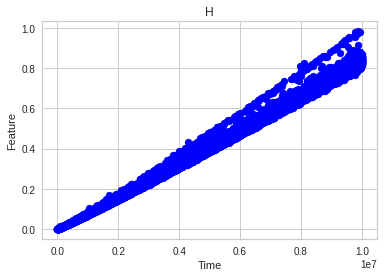

In [13]:
data=pd.read_csv('data2.txt',header=None)
data.columns=['Complexity','Timing']
x=data[['Complexity']]
y=data[['Timing']]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,)
plt.scatter(X_train,y_train,color='blue')
plt.title("H")
plt.ylabel("Feature")
plt.xlabel("Time")
plt.show()

hầu hết các điểm nằm giữa 2 đường, đường trên gần thẳng, đường dưới khá thẳng => Phù hợp với Linear Regression

Lựa chọn model và fit bộ dữ liệu X_train.values và y_train.values

In [14]:
model=LinearRegression().fit(X_train.values,y_train.values)
print("Slope: ",model.coef_)
print("Intercept: ",model.intercept_)
y_fit=model.predict(X_train.values)
y_predict=model.predict(X_test.values)

Slope:  [[8.4556115e-08]]
Intercept:  [-0.01591377]


In [19]:
mean_label=np.mean(y_test)
mean_label

Timing    0.407628
dtype: float64

Ứng dụng dự đoán cho model

In [16]:
def Prediction(x,train=X_train,model=model):
  # squarex=np.power(x,2)
  #log2x=np.log2(x,where=(x!=0))*x
   arr=np.array([[x]])
   pred=model.predict(arr)
   print("Thoi gian du tinh cua thuat toan voi do phuc tap ",x," la: ",pred[0][0])
Prediction(4426776)

Thoi gian du tinh cua thuat toan voi do phuc tap  4426776  la:  0.3583972104583744


Khả năng dự đoán của ứng dụng ta có thể đánh giá việc dự đoán của model trên bộ test set

Đánh giá mean square error: Trung bình của tổng bình phương về sự khác nhau giữa các data point dự đoán và data point thực tế (để tính xem tổng khoảng cách giữa fitted line và data point thực tế ). Mean square error càng nhỏ thì mô hình các khớp với bộ dữ liệu.

In [20]:
# See our Squared Mean Error score and Root Mean Squared Error:
test_mse = mean_squared_error(y_test, y_predict,)
print("mean square error: ",test_mse) 
print("mean label: ",mean_label)

mean square error 0.00014442191299350495
mean label Timing    0.407628
dtype: float64


In [21]:
import math
print(math.sqrt(test_mse))

0.012017566849970294


Dự đoán 40 lệch 1 => Không quá tệ nhưng vẫn thực hiện được